In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
model_features = pd.read_csv("ihc-files/ihc-all-st-features.csv")
model_features

,Ki67,braf,PDL epitel,PDL lenfos,vegf,cd34,cd34 score,P53
0,50,Negative,Negative,Negative,20,47,2,15
1,40,Negative,Negative,Negative,30,39,2,10
2,50,Negative,Negative,Negative,50,50,3,20
3,50,Negative,Negative,Weak,40,63,3,5
4,60,Negative,Negative,Weak,70,57,2,25
...,...,...,...,...,...,...,...,...
274,70,Negative,Negative,Negative,10,30,1,40
275,75,Negative,Negative,Intermediate,55,37,2,30
276,80,Negative,Negative,Weak,60,40,2,35
277,70,Negative,Negative,Intermediate,50,36,2,35


In [16]:
labels_df = pd.read_csv("ihc-files/ihc-all-st-labels.csv")
labels_df

,Subtype
0,hyperplastic
1,hyperplastic
2,hyperplastic
3,hyperplastic
4,villous
...,...
274,tubular
275,tubular
276,tubulovillous
277,tubular


In [17]:
target_names = list(labels_df.Subtype)
target = []
for i in target_names:
    if i == 'hyperplastic':
        target.append(0)
    elif i == "tubular":
        target.append(1)
    elif i == "inflamatuar":
        target.append(2)
    elif i == "villous":
        target.append(3)
    elif i == "tubulovillous":
        target.append(4)
    else:
        target.append(5)

In [18]:
len(target)

279

In [19]:
labels_df["Target"] = target
labels_df

,Subtype,Target
0,hyperplastic,0
1,hyperplastic,0
2,hyperplastic,0
3,hyperplastic,0
4,villous,3
...,...,...
274,tubular,1
275,tubular,1
276,tubulovillous,4
277,tubular,1


In [20]:
dummies = pd.get_dummies(model_features[["braf", "PDL epitel", "PDL lenfos"]], drop_first=True)
dummies 

,braf_Weak,braf_kuvvetli,PDL epitel_Negative,PDL epitel_Weak,PDL epitel_kuvvetli,PDL lenfos_Negative,PDL lenfos_Weak,PDL lenfos_kuvvetli
0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0,0
3,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
274,0,0,1,0,0,1,0,0
275,0,0,1,0,0,0,0,0
276,0,0,1,0,0,0,1,0
277,0,0,1,0,0,0,0,0


In [21]:
dummies["Ki67"] = model_features.Ki67
dummies["vegf"] = model_features.vegf
dummies["cd34"] = model_features.cd34
dummies["cd34 score"] = model_features["cd34 score"]
dummies["P53"] = model_features.P53
dummies

,braf_Weak,braf_kuvvetli,PDL epitel_Negative,PDL epitel_Weak,PDL epitel_kuvvetli,PDL lenfos_Negative,PDL lenfos_Weak,PDL lenfos_kuvvetli,Ki67,vegf,cd34,cd34 score,P53
0,0,0,1,0,0,1,0,0,50,20,47,2,15
1,0,0,1,0,0,1,0,0,40,30,39,2,10
2,0,0,1,0,0,1,0,0,50,50,50,3,20
3,0,0,1,0,0,0,1,0,50,40,63,3,5
4,0,0,1,0,0,0,1,0,60,70,57,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,0,1,0,0,1,0,0,70,10,30,1,40
275,0,0,1,0,0,0,0,0,75,55,37,2,30
276,0,0,1,0,0,0,1,0,80,60,40,2,35
277,0,0,1,0,0,0,0,0,70,50,36,2,35


In [22]:
dummies.isna().sum()

braf_Weak              0
braf_kuvvetli          0
PDL epitel_Negative    0
PDL epitel_Weak        0
PDL epitel_kuvvetli    0
PDL lenfos_Negative    0
PDL lenfos_Weak        0
PDL lenfos_kuvvetli    0
Ki67                   0
vegf                   0
cd34                   0
cd34 score             0
P53                    0
dtype: int64

In [23]:
X = dummies
y = labels_df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
clf.score(X_train, y_train)

1.0

In [26]:
y_preds = clf.predict(X_test)
y_preds

array([2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       4, 1, 1, 4, 0, 1, 2, 1, 1, 0, 0, 1, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2], dtype=int64)

In [27]:
clf.score(X_test, y_test)

0.5

In [28]:
clf_cv_score = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
clf_cv_score

C:\Users\tajud\Capstone\envs\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


array([0.57142857, 0.5       , 0.60714286, 0.64285714, 0.67857143,
       0.67857143, 0.67857143, 0.82142857, 0.60714286, 0.66666667])

In [29]:
clf_cv_score.mean()

0.6452380952380953

In [30]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.64      0.43      0.51        21
           1       0.53      0.79      0.63        24
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         1

    accuracy                           0.50        56
   macro avg       0.20      0.20      0.19        56
weighted avg       0.47      0.50      0.46        56



C:\Users\tajud\Capstone\envs\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tajud\Capstone\envs\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tajud\Capstone\envs\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


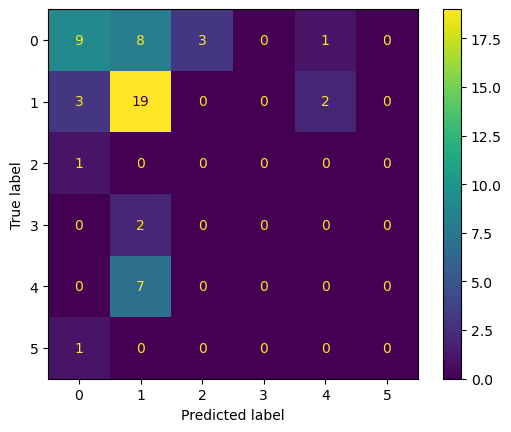

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()